## Background

#### Kaggle Learning Competition [Link](https://www.kaggle.com/competitions/spaceship-titanic)
#### Premise
We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

## Analysis Conclusions 

- Passengers in Spaceship Titanic came from 3 Home Planets - Earth, Mars & Europa.<br> 
- People from Earth belonged to lower economic classes. They were mostly housed in public rooms in the lower decks, had lower shopping spends in all categories.<br>
- People from Europa belonged to the highest economic class. They were housed in private rooms in the higher decks, had highest overall shopping spends.<br>
- People from Mars belonged to middle economic class. Their shopping spends were moderate and they were mostly housed in middle decks.<br>
- Last/Family Names of People were exclusive to the home planets indicating that there wasn't much travel/breeding between the planets.<br>
- Martians liked to spend on Room Service & Shopping Malls while Europans liked to spend on Spa, VR_Deck and FoodCourt. Not many Earthlings had money to spend on any of the luxuries.<br>
- Some of the people chose to enter CryoSleep for the long journey and they didn't spend anything at all.<br>
- There were very few VIPs on-board and their status didn't really help them much against transportation.<br>
- Most of the passengers were travelling to TRAPPIST 1-e Destination<br>

About half of all the passengers were transported.<br>
The collision transported different passenger groups disproportionately indicated by the correlations matrix. More specifically:<br>
- Passengers had higher probability of being transported in Decks C & B.
- There was a big hole in Starboard side of Deck G where almost all passengers got transported.
- Infants & Children from Mars & Europa were all transported.
- Passengers in CryoSleep also had higher probability of being transported.




## Table of Contents
- [1 - Packages & Data Import](#1)


- [2 - Feature Engineering](#2)
    - [2.1 - Deck from Cabin](#2.1)
    - [2.2 - Room From Cabin](#2.2)
    - [2.3 - Side From Cabin](#2.3)
    - [2.4 - Splitting Name into First & Last Names](#2.4)
    - [2.5 - Group No from Passenger ID](#2.5)
    - [2.6 - No within Group from Passenger ID](#2.6)
    - [2.7 - Converting to Numerical](#2.7)
    
    
- [3 - Data Analysis](#3)
    - [3.1 - Figure 1: Destination Counts](#3.1)
    - [3.2 - Figure 2: VIP Status Counts](#3.2)
    - [3.3 - Figure 3: Transported Counts](#3.3)
    - [3.4]
        - [3.4.1 - Figure 4: Age Distribution of all Planets](#3.4.1)
        - [3.4.2 - Figure 5: Age Distribution of Earth](#3.4.2)
        - [3.4.3 - Figure 6: Age Distribution of Mars & Europa](#3.4.3)
        - [3.4.4 - Figure 7: Age Distribution by Home Planet](#3.4.4)
    - [3.5 - Figure 8: CryoSleep Counts](#3.5)
    - [3.6 - Figure 9: Home Planet Counts](#3.6)
    - [3.7 - Figure 10: Feature Correlations](#3.7)
    - [3.8 - Figure 11: Transported Passengers By Deck](#3.8)
    - [3.9 - Figure 12: HomePlanets By Deck](#3.9)
    - [3.10 - Shopping By Planet](#3.10)
        - [3.10.1 - Shopping By Planet & CryoSleep](#3.10.1)
        - [3.10.2 - Figure 13: Shopping By Planet Visualized](#3.10.2)
    - [3.11 - Last Names By Homeplanets](#3.11)
    - [3.12 - Groups & Homeplanets](#3.12)
    

- [4 - More Feature Engineering & Visualizations](#4)
    - [4.1 - Total Spends & Shopping Types](#4.1)
    - [4.2 - Group Size](#4.2)
    - [4.3 - Creating Age Cohorts](#4.3)


- [5 - Handling Missing Values](#5)
    - [5.1 - Analyzing Missing Values](#5.1)
    - [5.2 - Filling Missing Homeplanet Values](#5.2)
    - [5.3 - Filling Missing CryoSleep Values](#5.3)
    - [5.4 - Using scikit-learns Iterative Imputer](#5.4)
    
    
- [6 - Final Round of Feature Engineering](#6)
    - [6.1 - Gap Feature](#6.1)
    - [6.2 - Infant/Child with Homeplanet](#6.2)
    
    
- [7 - Saving the Data For ML Training](#7)


- [8 - Note on Feature Selection](#8)


<a name='1'></a>
## 1 - Packages & Data Import

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [302]:
df = pd.read_csv('Data//train.csv')
df_test = pd.read_csv('Data//test.csv')

<a name='2'></a>
## 2 - Feature Engineering

In [303]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<a name='2.1'></a>
#### 2.1 - Deck from Cabin

In [304]:
df['Deck'] = df['Cabin'].str[:1]
df_test['Deck'] = df_test['Cabin'].str[:1]
df['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

<a name='2.2'></a>
#### 2.2 - Room From Cabin

In [305]:
df['Room'] = df['Cabin'].str[2:-2]
df_test['Room'] = df_test['Cabin'].str[2:-2]
df['Room'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Room, Length: 1817, dtype: int64

<a name='2.3'></a>
#### 2.3 - Side From Cabin

In [306]:
df['Side'] = df['Cabin'].str[-1]
df_test['Side'] = df_test['Cabin'].str[-1]
df['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

<a name='2.4'></a>
#### 2.4 - Splitting Name into First & Last Names

In [307]:
df[['first_name', 'last_name']] = df['Name'].str.split(" ",expand=True)
df_test[['first_name', 'last_name']] = df_test['Name'].str.split(" ",expand=True)
df['first_name'].value_counts()

Idace      13
Loree      12
Glena      11
Gwendy     11
Kaye       11
           ..
Capies      1
Blues       1
Preonon     1
Siese       1
Chain       1
Name: first_name, Length: 2706, dtype: int64

<a name='2.5'></a>
#### 2.5 - Group No from Passenger ID

In [308]:
df['Group'] = df['PassengerId'].str[:4]
df_test['Group'] = df_test['PassengerId'].str[:4]
df['Group'].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Group, Length: 6217, dtype: int64

<a name='2.6'></a>
#### 2.6 - No within Group from Passenger ID

In [309]:
df['no_within_group'] = pd.to_numeric(df['PassengerId'].str[-2:])
df_test['no_within_group'] = pd.to_numeric(df_test['PassengerId'].str[-2:])

<a name='2.7'></a>
#### 2.7 - Converting to Numerical

In [310]:
df['VIP'] = df['VIP'].map({True:1,False:0})
df_test['VIP'] = df_test['VIP'].map({True:1,False:0})
df['CryoSleep'] = df['CryoSleep'].map({True:1,False:0})
df_test['CryoSleep'] = df_test['CryoSleep'].map({True:1,False:0})
df['Transported'] = df['Transported'].map({True:1,False:0})

df['Room'] = pd.to_numeric(df['Room'])
df_test['Room'] = pd.to_numeric(df_test['Room'])

df['Group'] = pd.to_numeric(df['Group'])
df_test['Group'] = pd.to_numeric(df_test['Group'])

df['Side'] = df['Side'].map({'P':1,'S':2})
df_test['Side'] = df_test['Side'].map({'P':1,'S':2})

<a name='3'></a>
## 3 - Data Analysis

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8691 non-null   object 
 2   CryoSleep        8595 non-null   float64
 3   Cabin            8494 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8490 non-null   float64
 7   RoomService      8693 non-null   float64
 8   FoodCourt        8693 non-null   float64
 9   ShoppingMall     8693 non-null   float64
 10  Spa              8693 non-null   float64
 11  VRDeck           8693 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   int64  
 14  Deck             8494 non-null   object 
 15  Room             8494 non-null   float64
 16  Side             8494 non-null   float64
 17  first_name    

<a name='3.1'></a>
#### 3.1 - Figure 1: Destination Counts

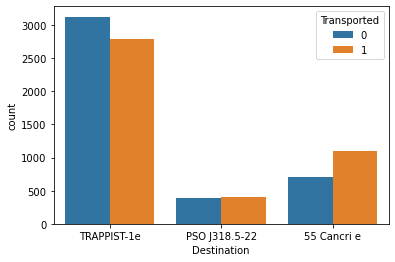

In [366]:
sns.countplot(data=df,x='Destination',hue='Transported');

<a name='3.2'></a>
#### 3.2 - Figure 2: VIP Status Counts

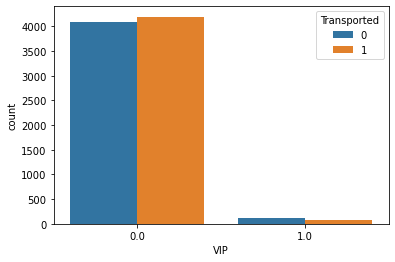

In [367]:
sns.countplot(data = df, x = 'VIP',hue='Transported');

<a name='3.3'></a>
#### 3.3 - Figure 3: Transported Counts

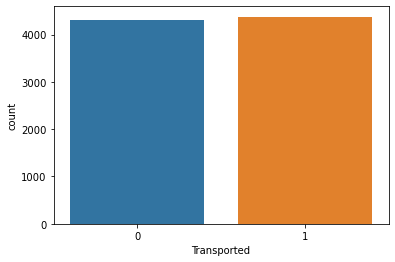

In [368]:
sns.countplot(data = df, x = 'Transported');

<a name='3.4.1'></a>
#### 3.4.1 - Figure 4: Age Distribution of all Planets

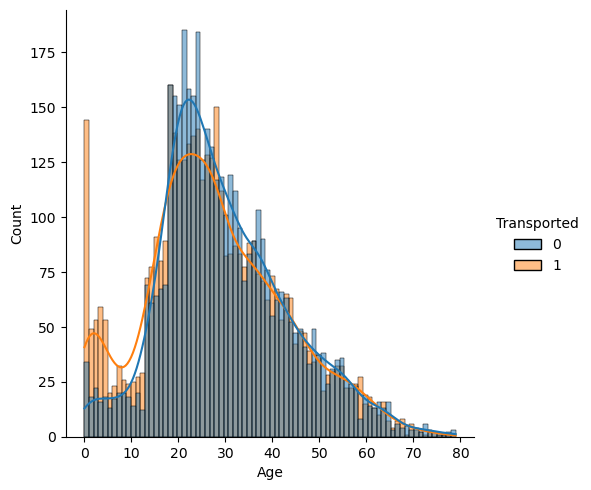

In [369]:
p = sns.displot(data=df,x='Age',hue='Transported',kde=True,bins=80)
p.fig.set_dpi(100)

<a name='3.4.2'></a>
#### 3.4.2 - Figure 5: Age Distribution of Earth

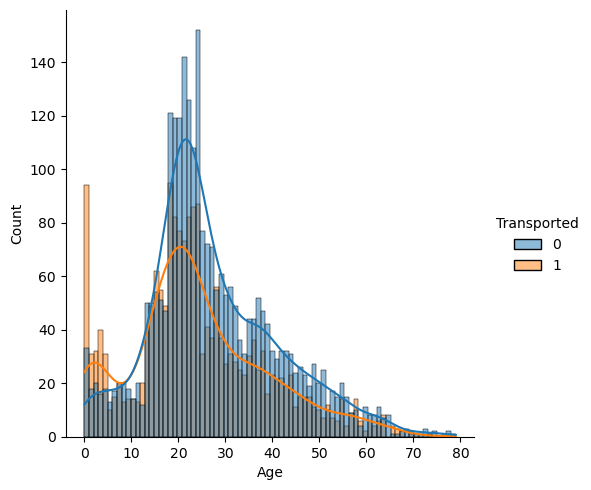

In [370]:
p = sns.displot(data=df[df['HomePlanet']=='Earth'],x='Age',hue='Transported',kde=True,bins=80)
p.fig.set_dpi(100)

<a name='3.4.3'></a>
#### 3.4.3 - Figure 6: Age Distribution of Mars & Europa

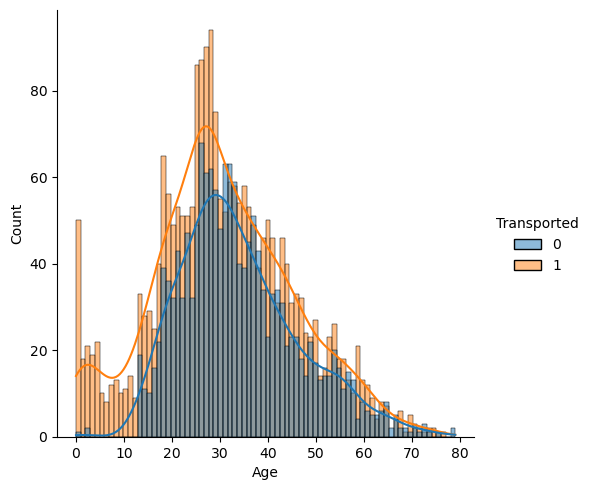

In [371]:
p = sns.displot(data=df[df['HomePlanet']!='Earth'],x='Age',hue='Transported',kde=True,bins=80)
p.fig.set_dpi(100)

Age is not strictly normally distributed.<br>
Age Groups 0-5 had high proportion of transported people. <br>
5-18 had moderately higher chances of being transported. <br>
18-42 Age Groups had lower proportion of missing values. <br>
42+ Age Groups had equal probabilities of missing. <br>
Further, all of the infants from Mars or Europa were transported. Let's explore this in a violin plot.<br>

<a name='3.4.4'></a>
#### 3.4.4 - Figure 7: Age Distribution by Home Planet

<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

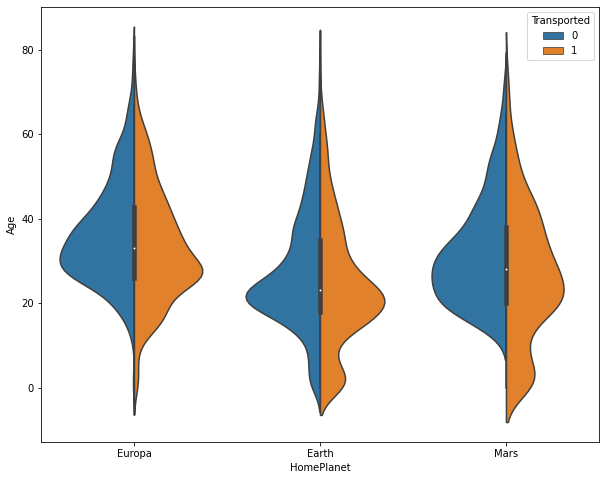

In [372]:
plt.figure(figsize=(10,8))
sns.violinplot(x ='HomePlanet', y ='Age', data = df, hue ='Transported', split = True)

Barely any infants(0-13) from Europa and Mars survived while infants from Earth had a much better rate of survival.

<a name='3.5'></a>
#### 3.5 - Figure 8: CryoSleep Counts

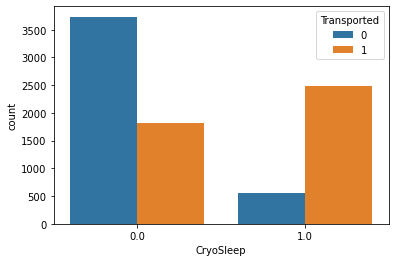

In [373]:
sns.countplot(data=df,x='CryoSleep',hue='Transported');

<a name='3.6'></a>
#### 3.6 - Figure 9: Home Planet Counts

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

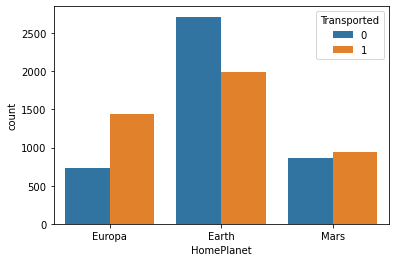

In [374]:
sns.countplot(data = df, x = 'HomePlanet',hue='Transported')

<a name='3.7'></a>
#### 3.7 - Figure 10: Feature Correlations

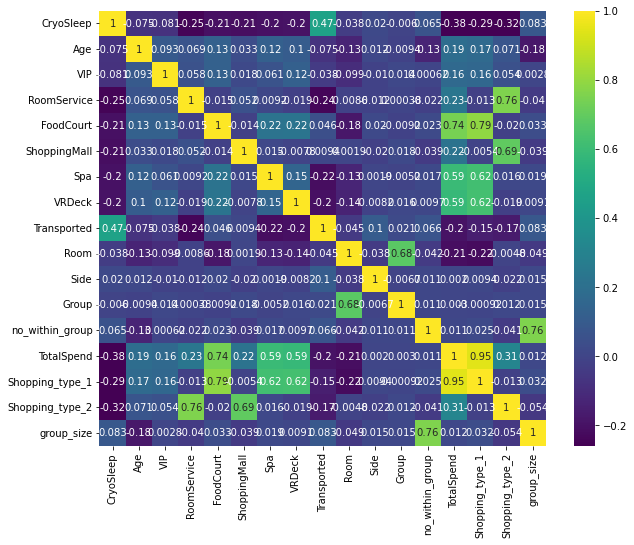

In [375]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',robust=True);

<a name='3.8'></a>
#### 3.8 - Figure 11: Transported Passengers By Deck

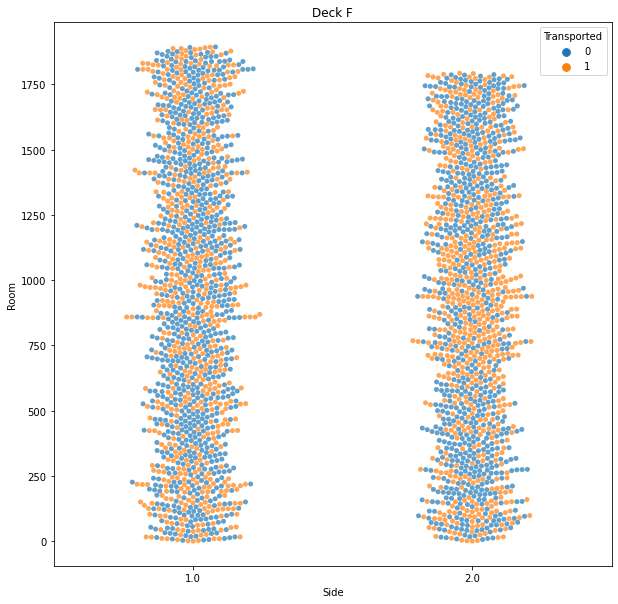

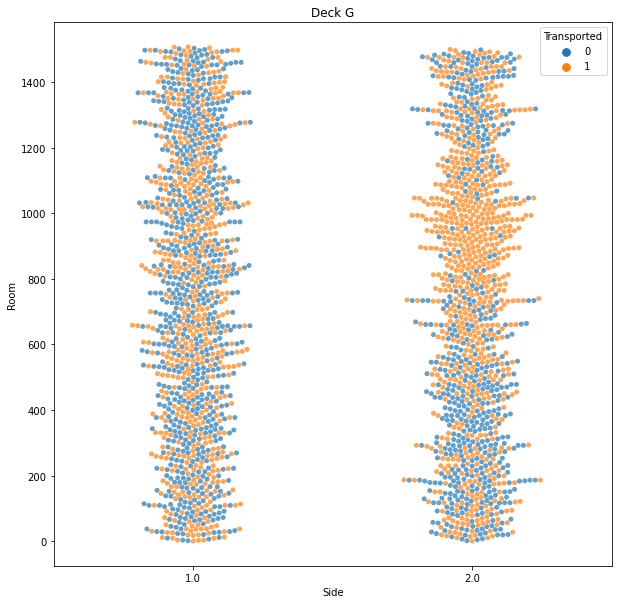

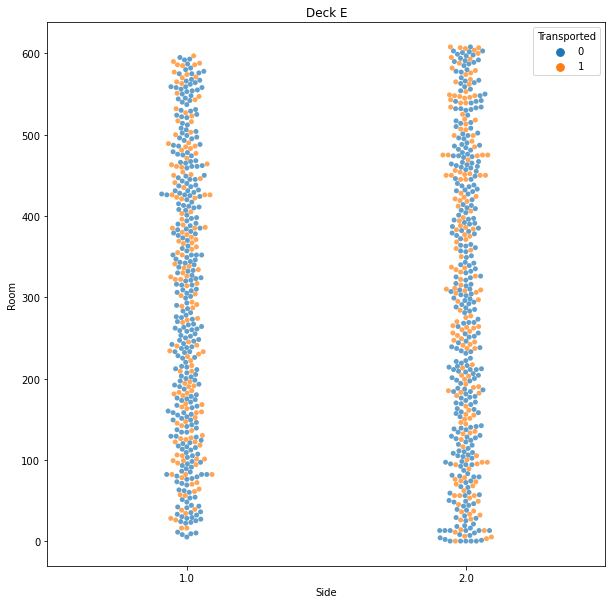

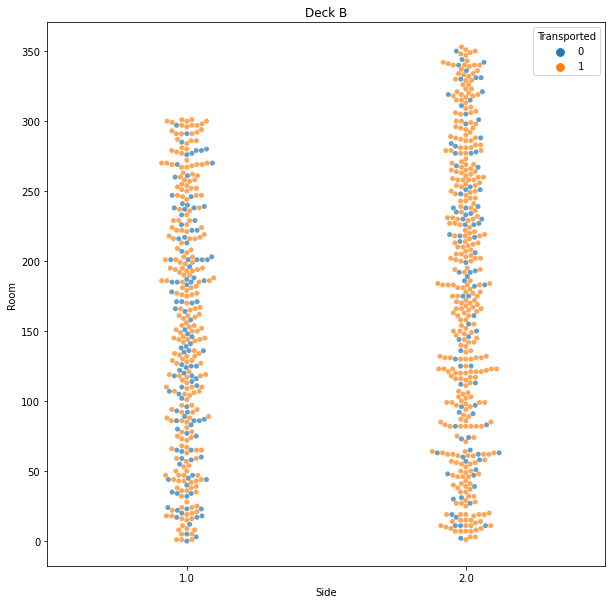

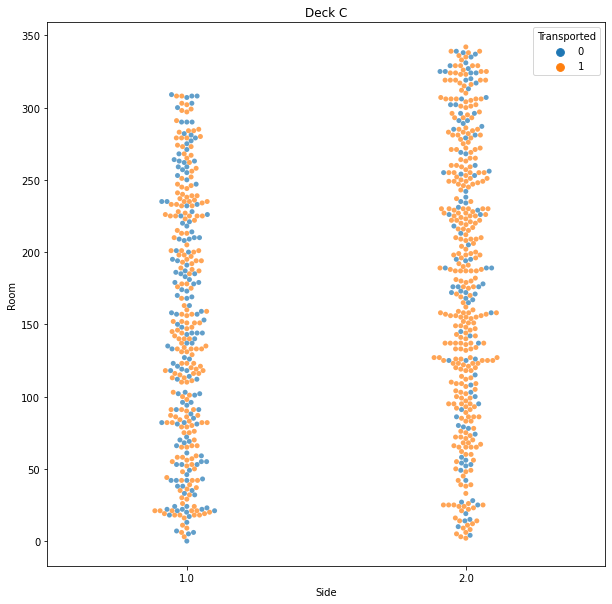

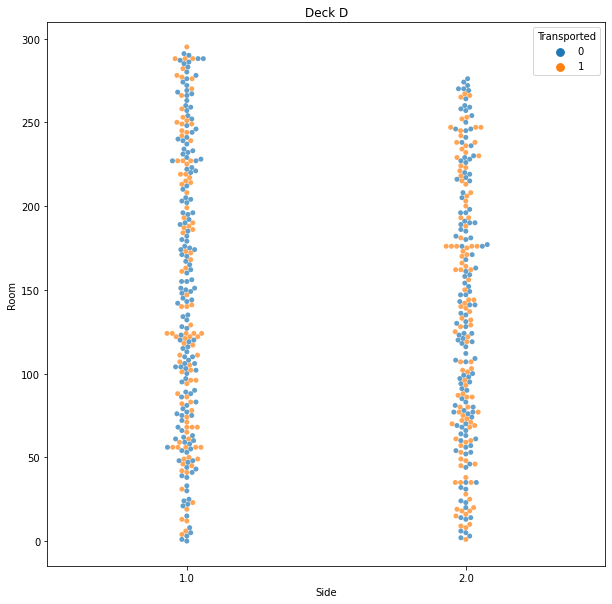

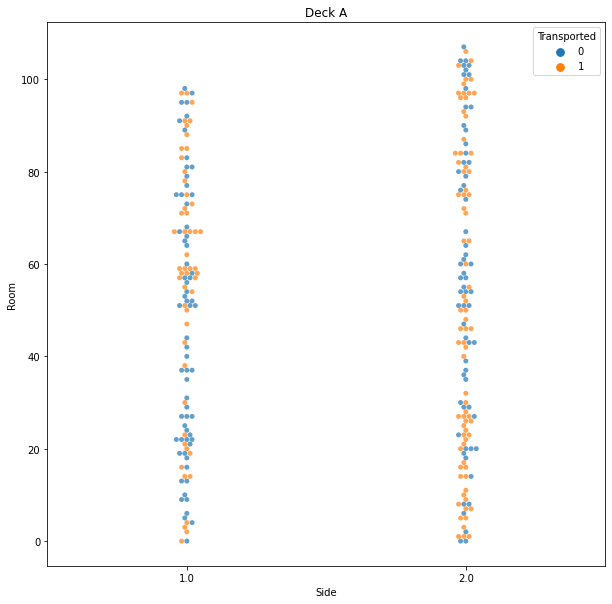

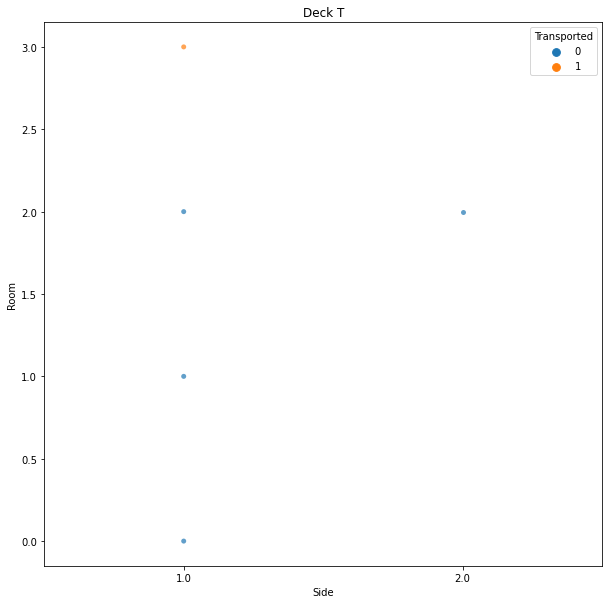

In [376]:
decks = df['Deck'].value_counts()
for i in range(len(decks)):
    plt.figure(figsize=(10,10))
    k = sns.swarmplot(data=df[df['Deck'] == decks.index[i]],y='Room',x='Side',alpha=0.7,hue='Transported')
    k.set_title(f"Deck {decks.index[i]}")

Deck G Rooms 770-1150 Side 2 had a high rate of Transported People.<br> Decks B & C had a high proportion of missing people <br>So, the physical location of passenger within the ship played a vital role.

<a name='3.9'></a>
#### 3.9 - Figure 12: HomePlanets By Deck

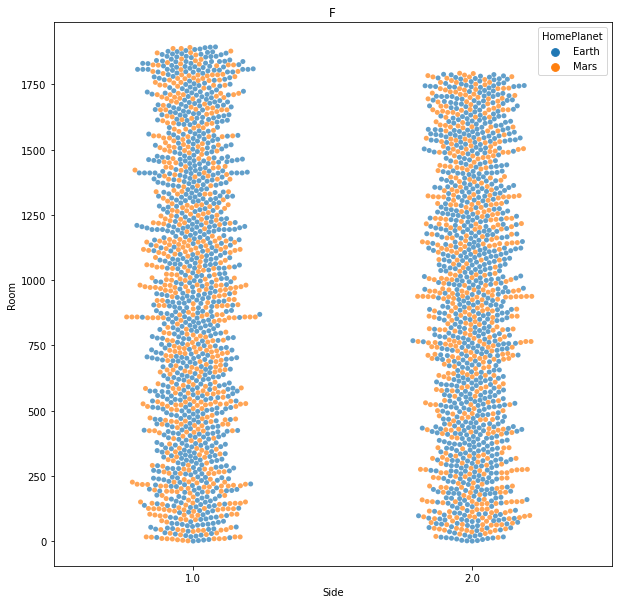

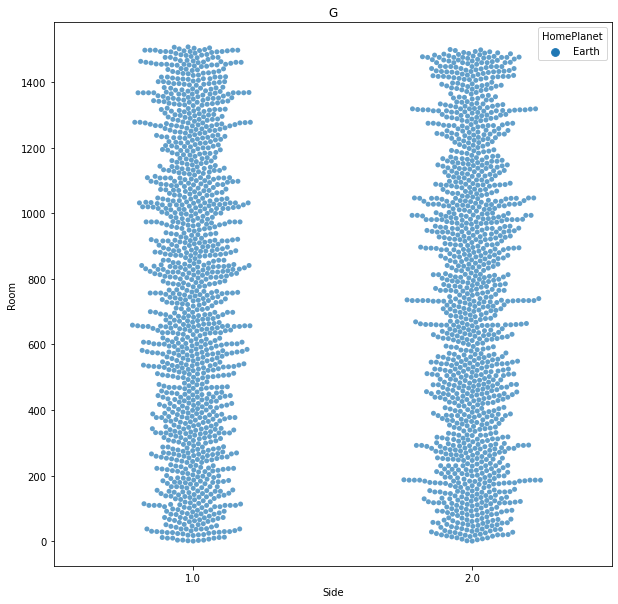

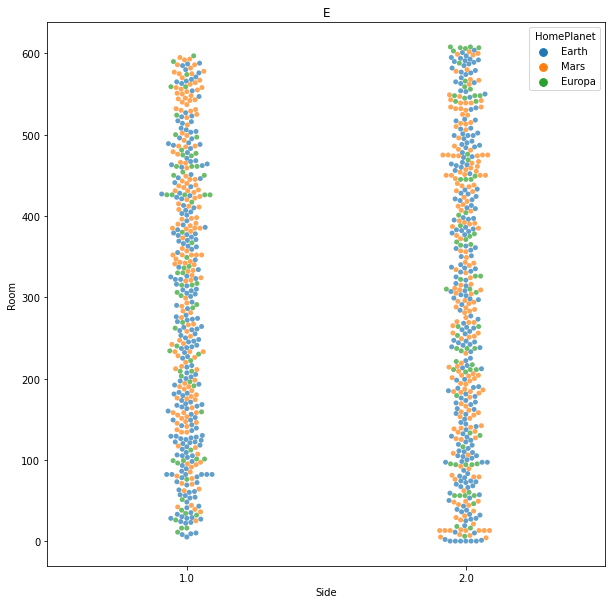

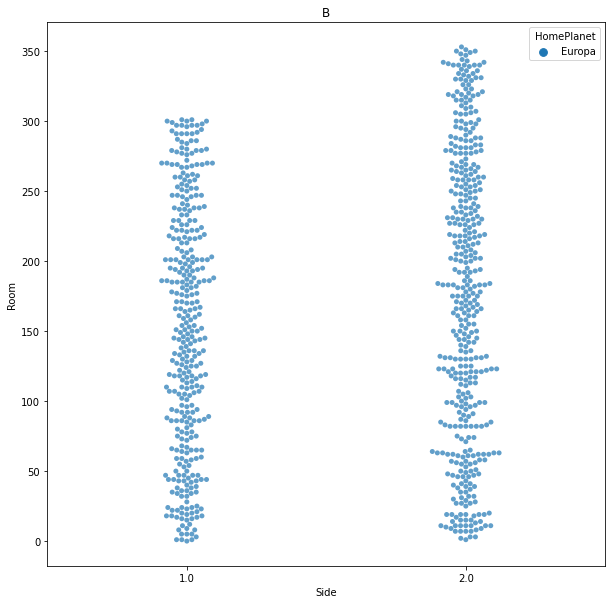

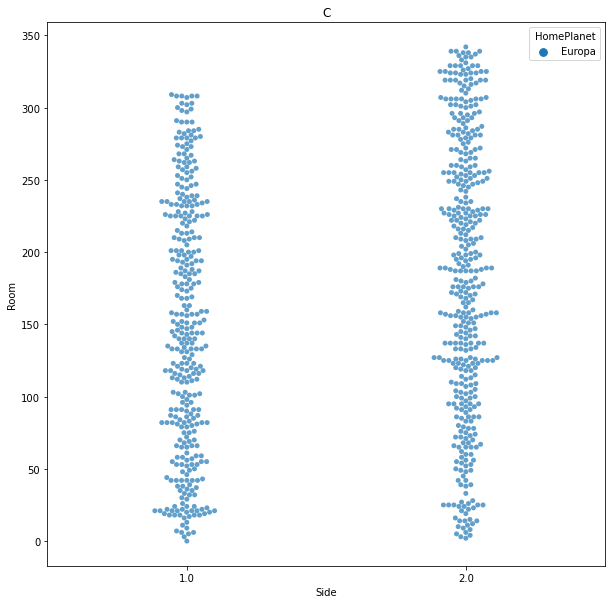

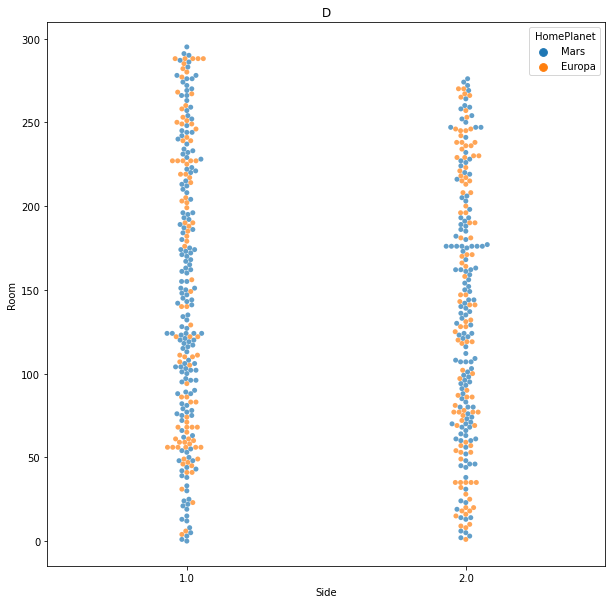

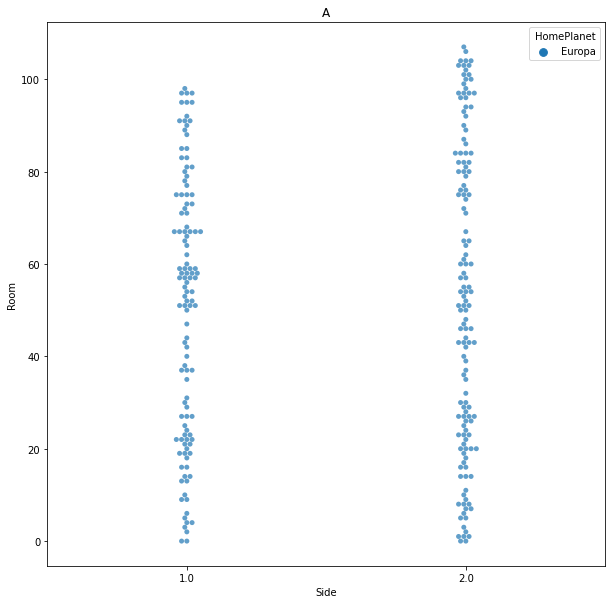

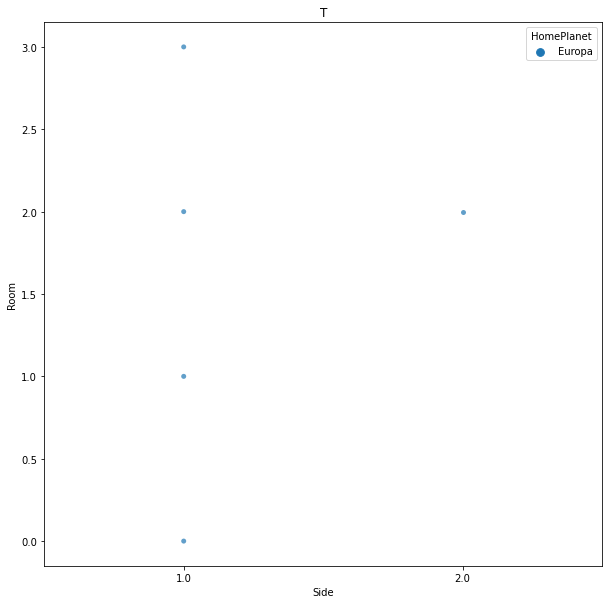

In [377]:
for i in range(len(decks)):
    plt.figure(figsize=(10,10))
    k = sns.swarmplot(data=df[df['Deck'] == decks.index[i]],y='Room',x='Side',alpha=0.7,hue='HomePlanet')
    k.set_title(decks.index[i])

T A C B Decks are filled exclusively with Europa Passengers.
G Deck is exclusively for Earth Passengers.

We can fill missing HomePlanet Values for passengers who belong to these decks.

<a name='3.10'></a>
#### 3.10 - Shopping By Planet

<a name='3.10.1'></a>
#### 3.10.1 - Shopping By Planet & CryoSleep

In [378]:
df.groupby(['HomePlanet','CryoSleep']).mean()[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

RoomService    FoodCourt  ShoppingMall          Spa  \
HomePlanet CryoSleep                                                        
Earth      0.0         193.395878   194.716703    188.109505   201.277761   
           1.0           0.000000     0.000000      0.000000     0.000000   
Europa     0.0         253.583127  2617.405294    260.242349  1487.519438   
           1.0           0.000000     0.000000      0.000000     0.000000   
Mars       0.0         890.819508    88.197812    499.466727   177.769371   
           1.0           0.000000     0.000000      0.000000     0.000000   

                           VRDeck  
HomePlanet CryoSleep               
Earth      0.0         196.506921  
           1.0           0.000000  
Europa     0.0        1545.376344  
           1.0           0.000000  
Mars       0.0          75.149499  
           1.0           0.000000

People in Cryosleep don't spend money. We can fill missing CryoSleep values if shopping spends are 0.

<a name='3.10.2'></a>
#### 3.10.2 - Figure 13: Shopping By Planet Visualized

In [379]:
spends = df[df['CryoSleep']==False].groupby('HomePlanet').mean()[['RoomService','FoodCourt','ShoppingMall'
                                                        ,'Spa','VRDeck']]
spends = (spends-spends.mean())/spends.std()


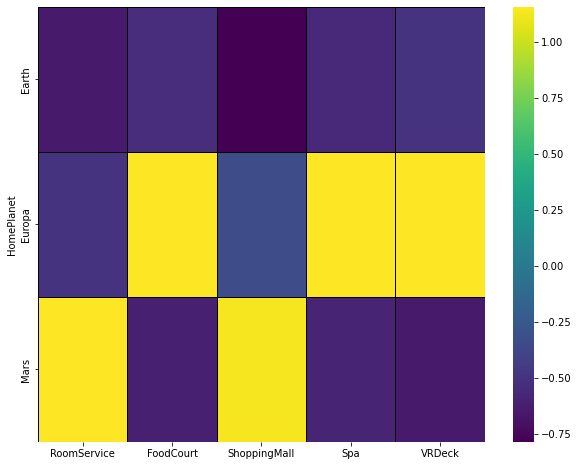

In [380]:
plt.figure(figsize=(10,8))
sns.heatmap(spends,linecolor='black',linewidth=1,cmap='viridis');

People from Mars relatively spent more on Room Service & Shopping Mall. <br>
People from Europa spent relatively more on FoodCourt, Spa & VRDeck. <br>
People from Earth spent low on any kind of shopping.<br>
These are important clues for filling missing values and feature engineering.

<a name='3.11'></a>
#### 3.11 - Last Names By Homeplanets

In [381]:
last_names_planets = df.groupby(['last_name','HomePlanet']).count()['PassengerId'].unstack().fillna(0)

In [382]:
last_names_planets

HomePlanet,Earth,Europa,Mars
last_name,,,
Acobson,4.0,0.0,0.0
Acobsond,3.0,0.0,0.0
Adavisons,9.0,0.0,0.0
Adkinson,3.0,0.0,0.0
Admingried,0.0,4.0,0.0
...,...,...,...
Wynneyerson,2.0,0.0,0.0
Yanton,7.0,0.0,0.0
Yatters,4.0,0.0,0.0


In [383]:
#Checking If any family name from Earth are present in family names in Mars/Europa
last_names_planets[(last_names_planets['Earth'] > 0) & ((last_names_planets['Europa'] != 0) | (last_names_planets['Mars'] != 0))]

HomePlanet,Earth,Europa,Mars
last_name,,,


In [384]:
#Checking If any family name from Europa are present in family names in Mars/Earth
last_names_planets[(last_names_planets['Europa'] > 0) & ((last_names_planets['Earth'] != 0) | (last_names_planets['Mars'] != 0))]

HomePlanet,Earth,Europa,Mars
last_name,,,


In [385]:
#Checking If any family name from Mars are present in family names in Europa/Earth
last_names_planets[(last_names_planets['Mars'] > 0) & ((last_names_planets['Earth'] != 0) | (last_names_planets['Europa'] != 0))]

HomePlanet,Earth,Europa,Mars
last_name,,,


We see that family names are exclusive to the planets. Now we can fill empty HomePlanets where name is present.

<a name='3.11'></a>
#### 3.12 - Groups & Homeplanets

In [386]:
df[df['Group'] == 4371]['HomePlanet']

4095    Europa
4096    Europa
4097    Europa
4098    Europa
4099    Europa
Name: HomePlanet, dtype: object

People of same group belong to same home planet.

<a name='4'></a>
## 4 - More Feature Engineering & Visualizations

<a name='4.1'></a>
#### 4.1 - Total Spends & Shopping Types

In [333]:
#Filling Missing Spend Values with 0.
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df[['RoomService',
                                                                    'FoodCourt',
                                                                    'ShoppingMall',
                                                                    'Spa',
                                                                    'VRDeck']].fillna(0)
df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService',
                                                                              'FoodCourt',
                                                                              'ShoppingMall',
                                                                              'Spa',
                                                                              'VRDeck']].fillna(0)

In [334]:
df['TotalSpend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'] 
df_test['TotalSpend'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck'] 

In [335]:
df['Shopping_type_1'] = df['FoodCourt'] + df['Spa'] + df['VRDeck']
df_test['Shopping_type_1'] = df_test['FoodCourt'] + df_test['Spa'] + df_test['VRDeck']
df['Shopping_type_2'] = df['RoomService'] + df['ShoppingMall']
df_test['Shopping_type_2'] = df_test['RoomService'] + df_test['ShoppingMall']

<AxesSubplot:xlabel='TotalSpend', ylabel='HomePlanet'>

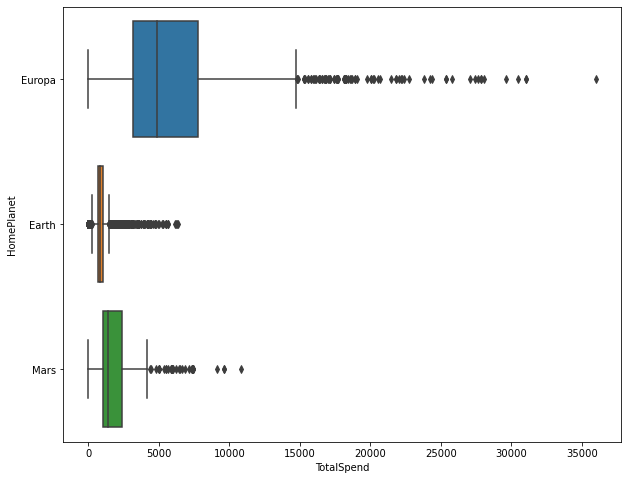

In [336]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[df['CryoSleep']==False],x='TotalSpend',y='HomePlanet',orient='h')

<AxesSubplot:xlabel='Shopping_type_1', ylabel='HomePlanet'>

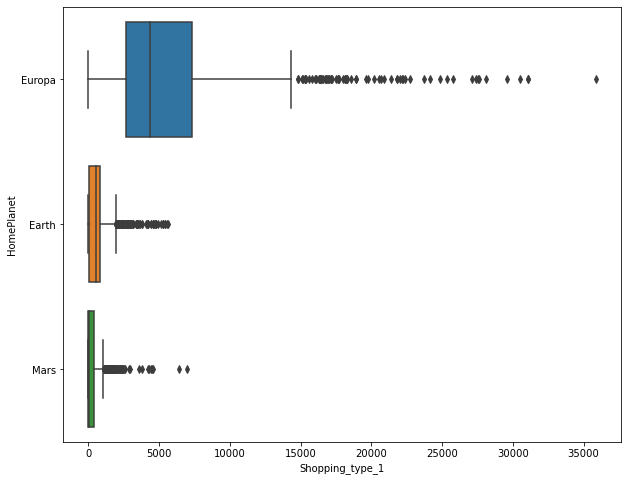

In [337]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[df['CryoSleep']==False],x='Shopping_type_1',y='HomePlanet',orient='h')

<AxesSubplot:xlabel='Shopping_type_2', ylabel='HomePlanet'>

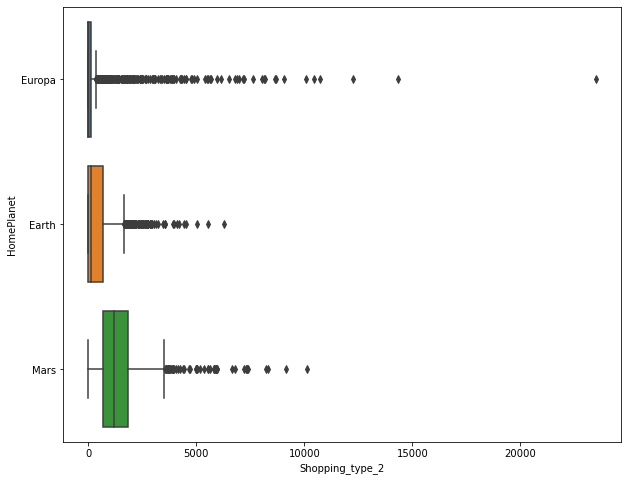

In [338]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[df['CryoSleep']==False],x='Shopping_type_2',y='HomePlanet',orient='h')

<a name='4.2'></a>
#### 4.2 - Group Size

In [339]:
#Calculate Group Size from max no_within_group
group_size = df.groupby('Group')['no_within_group'].agg(['max'])
group_size_test = df_test.groupby('Group')['no_within_group'].agg(['max'])
df = pd.merge(df,group_size,how='left',left_on='Group',right_index=True)
df_test = pd.merge(df_test,group_size_test,how='left',left_on='Group',right_index=True)
df = df.rename({'max':'group_size'},axis=1)
df_test = df_test.rename({'max':'group_size'},axis=1)

<a name='4.3'></a>
#### 4.3 - Creating Age Cohorts

In [340]:
def age_cohort(age):
    if age <= 5:
        return 'infant'
    elif age<= 13:
        return 'child'
    elif age <= 18:
        return 'teen'
    elif age <= 42:
        return 'adult'
    elif age > 42:
        return 'elder'
        

In [341]:
df['Age_Group'] = df['Age'].apply(age_cohort)
df_test['Age_Group'] = df_test['Age'].apply(age_cohort)

<a name='5'></a>
## 5 - Handling Missing Values

<a name='5.1'></a>
#### 5.1 - Analyzing Missing Values

In [342]:
round(100*df.isnull().sum()/8693,2)

PassengerId        0.00
HomePlanet         2.31
CryoSleep          2.50
Cabin              2.29
Destination        2.09
Age                2.06
VIP                2.34
RoomService        0.00
FoodCourt          0.00
ShoppingMall       0.00
Spa                0.00
VRDeck             0.00
Name               2.30
Transported        0.00
Deck               2.29
Room               2.29
Side               2.29
first_name         2.30
last_name          2.30
Group              0.00
no_within_group    0.00
TotalSpend         0.00
Shopping_type_1    0.00
Shopping_type_2    0.00
group_size         0.00
Age_Group          2.06
dtype: float64

In [343]:
round(100*df_test.isnull().sum()/4277,2)

PassengerId        0.00
HomePlanet         2.03
CryoSleep          2.17
Cabin              2.34
Destination        2.15
Age                2.13
VIP                2.17
RoomService        0.00
FoodCourt          0.00
ShoppingMall       0.00
Spa                0.00
VRDeck             0.00
Name               2.20
Deck               2.34
Room               2.34
Side               2.34
first_name         2.20
last_name          2.20
Group              0.00
no_within_group    0.00
TotalSpend         0.00
Shopping_type_1    0.00
Shopping_type_2    0.00
group_size         0.00
Age_Group          2.13
dtype: float64

In [344]:
pd.options.mode.chained_assignment = None

<a name='5.2'></a>
#### 5.2 - Filling Missing Homeplanet Values

In [345]:
#T A C B Decks are filled exclusively with Europa Passengers. G Deck is exclusively for Earth Passengers.

df['HomePlanet'][(df['HomePlanet'].isnull()) & (df['Deck'] == 'G')] = 'Earth'
df_test['HomePlanet'][(df_test['HomePlanet'].isnull()) & (df_test['Deck'] == 'G')] = 'Earth'

df['HomePlanet'][(df['HomePlanet'].isnull()) & ((df['Deck'] == 'T') 
                                                | (df['Deck'] == 'A') | (df['Deck'] == 'C') 
                                                | (df['Deck'] == 'B'))] = 'Europa'
df_test['HomePlanet'][(df_test['HomePlanet'].isnull()) & ((df_test['Deck'] == 'T') 
                                                | (df_test['Deck'] == 'A') | (df_test['Deck'] == 'C') 
                                                | (df_test['Deck'] == 'B'))] = 'Europa'

In [346]:
last_names_planets['HomePlanet'] = last_names_planets.apply(lambda x: 'Earth' if x.Earth > 0 else ('Europa' if x['Europa'] > 0 else 'Mars'),axis=1 )

In [347]:
# Merging family name per Homeplanet
df =  pd.merge(df,last_names_planets['HomePlanet'],how='left',left_on='last_name',right_on='last_name')
df_test = pd.merge(df_test,last_names_planets['HomePlanet'],how='left',left_on='last_name',right_on='last_name')

df['HomePlanet_x'] = df['HomePlanet_x'].fillna(df['HomePlanet_y'])
df_test['HomePlanet_x'] = df_test['HomePlanet_x'].fillna(df_test['HomePlanet_y'])

In [348]:
df = df.drop('HomePlanet_y',axis=1)
df = df.rename({'HomePlanet_x':'HomePlanet'},axis=1)
df_test = df_test.drop('HomePlanet_y',axis=1)
df_test = df_test.rename({'HomePlanet_x':'HomePlanet'},axis=1)

In [349]:
# Passenger 5603_01 is from Europa due to high Shopping Type 1 Spend
# Passenger 2443_01 is from Mars due to high Shopping Type 2 Spend and Deck D. Earth people are not on Deck D.
# Will assign Mars to 2817_01 & 0242_01 based on higher shopping spends
# Will assign Earth to 3331_01 based on median and mean spends
# Will assign Earth to 5989_01 and 6108_01 based on lower median and mean spends.
# Deck F HomePlanet mode is Earth. Will fill 4840_01 with Earth.

In [350]:
df.loc[5252,'HomePlanet'] = 'Europa'
df.loc[2274,'HomePlanet'] = 'Mars'
df.loc[2631,'HomePlanet'] = 'Mars'
df.loc[225,'HomePlanet'] = 'Mars'
df.loc[5634,'HomePlanet'] = 'Earth'
df.loc[5762,'HomePlanet'] = 'Earth'
df.loc[3091,'HomePlanet'] = 'Earth'
df.loc[4548,'HomePlanet'] = 'Earth'

In [351]:
df_test[df_test['HomePlanet'].isnull() & df_test['last_name'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Side,first_name,last_name,Group,no_within_group,TotalSpend,Shopping_type_1,Shopping_type_2,group_size,Age_Group
2952,6499_02,NaN,0.0,F/1346/P,TRAPPIST-1e,13.0,0.0,2195.0,0.0,21.0,...,1.0,NaN,NaN,6499,2,2216.0,0.0,2216.0,8,child
2989,6559_03,NaN,0.0,F/1252/S,TRAPPIST-1e,35.0,0.0,252.0,6.0,878.0,...,2.0,NaN,NaN,6559,3,1139.0,9.0,1130.0,3,adult
3858,8435_01,NaN,NaN,F/1730/P,TRAPPIST-1e,19.0,0.0,162.0,11.0,0.0,...,1.0,NaN,NaN,8435,1,1389.0,1227.0,162.0,1,adult


In [352]:
df_test.loc[2952,'HomePlanet'] = 'Earth'
df_test.loc[2989,'HomePlanet'] = 'Earth'
df_test.loc[3858,'HomePlanet'] = 'Earth'
df_test.loc[1890,'HomePlanet'] = 'Europa'
df_test.loc[1404,'HomePlanet'] = 'Europa'
df_test.loc[276,'HomePlanet'] = 'Europa'
df_test.loc[1457,'HomePlanet'] = 'Europa'
df_test.loc[3220,'HomePlanet'] = 'Mars' #Mode
df_test.loc[4032,'HomePlanet'] = 'Mars' #Mode


<a name='5.3'></a>
#### 5.3 - Filling Missing CryoSleep Values

In [353]:
#If a passenger has spent money, they can't be in CryoSleep.
#217 have missing Cryosleep
#119 of those have spent money. We can set their cryosleep to 0 straight away.
def fill_cabin(row):
    if row['CryoSleep'] not in [0,1]:
        if row['TotalSpend'] > 0:
            row['CryoSleep'] = 0
    
    return row
        
    

In [354]:
df = df.apply(fill_cabin,axis=1)

<a name='5.4'></a>
#### 5.4 - Using scikit-learns Iterative Imputer

In [355]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [356]:
impute_df = df.drop(['PassengerId','Name','Cabin','first_name','last_name','Age_Group','Transported'],axis=1)
impute_df_test = df_test.drop(['PassengerId','Name','Cabin','first_name','last_name','Age_Group'],axis=1)

impute_df = impute_df.set_axis(df['PassengerId'])
impute_df_test = impute_df_test.set_axis(df_test['PassengerId'])

impute_df = pd.get_dummies(impute_df,drop_first=True)
impute_df_test = pd.get_dummies(impute_df_test,drop_first=True)

In [357]:
def imputer(estimator):
    it_imp = IterativeImputer(max_iter=20,estimator=estimator,random_state=101,verbose=2)
    it_imp.fit(impute_df)
    filled_df = it_imp.transform(impute_df)
    filled_df_test = it_imp.transform(impute_df_test)
    filled_df = pd.DataFrame(filled_df,index=impute_df.index,columns=impute_df.columns)
    filled_df_test = pd.DataFrame(filled_df_test,index=impute_df_test.index,columns=impute_df_test.columns)
    
    filled_df['Age_Group'] = filled_df['Age'].apply(age_cohort)
    filled_df = pd.get_dummies(filled_df,drop_first=True)
    
    filled_df_test['Age_Group'] = filled_df_test['Age'].apply(age_cohort)
    filled_df_test = pd.get_dummies(filled_df_test,drop_first=True)
    
    return filled_df,filled_df_test
    

In [358]:
bayes_imputed_df,bayes_imputed_df_test = imputer(BayesianRidge())

[IterativeImputer] Completing matrix with shape (8693, 27)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.39
[IterativeImputer] Change: 1137.7833491320948, scaled tolerance: 35.987 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.77
[IterativeImputer] Change: 2.2418151184832116, scaled tolerance: 35.987 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (8693, 27)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.01
[IterativeImputer] Completing matrix with shape (4277, 27)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.00


<a name='6'></a>
## 6 - Final Round of Feature Engineering

With filled Age, Room_No & Home Planet values, we can engineer a few more features.

<a name='6.1'></a>
#### 6.1 - Gap Feature

In [359]:
def is_gap(row):
    '''
    Function to check whether the passenger's room was in the Gap i.e. Deck G, Side 2 & between rooms 830 & 1090. 
    (Refer Figure 11)
    '''
    if row['Deck_G'] == 1 and row['Side'] == 2:
        if row['Room'] >= 830 and row['Room'] <= 1090:
            return 1
        else:
            return 0
    
    else:
        return 0

In [360]:
bayes_imputed_df['Gap'] = bayes_imputed_df.apply(is_gap,axis=1)
bayes_imputed_df_test['Gap'] = bayes_imputed_df_test.apply(is_gap,axis=1)

<a name='6.2'></a>
#### 6.2 - Infant/Child with Homeplanet

In [361]:
### Feature indicating whether the person was an earth infant or non-earth infant. (Refer Figure 7)
def earth_infant(row):
    if row['Age_Group_infant'] == 1:
        if row['HomePlanet_Europa'] == 0 and row['HomePlanet_Mars'] == 0:
            return 1
        else:
            return 0
    else:
        return 0

def non_earth_infant(row):
    if row['Age_Group_infant'] == 1:
        if row['HomePlanet_Europa'] == 1 or row['HomePlanet_Mars'] == 1:
            return 1
        else:
            return 0
     
    else:
        return 0
def earth_child(row):
    if row['Age_Group_child'] == 1:
        if row['HomePlanet_Europa'] == 0 and row['HomePlanet_Mars'] == 0:
            return 1
        else:
            return 0
    else:
        return 0
def non_earth_child(row):
    if row['Age_Group_child'] == 1:
        if row['HomePlanet_Europa'] == 1 or row['HomePlanet_Mars'] == 1:
            return 1
        else:
            return 0
     
    else:
        return 0

In [362]:
bayes_imputed_df['earth_infant'] = bayes_imputed_df.apply(earth_infant,axis=1)
bayes_imputed_df['earth_child'] = bayes_imputed_df.apply(earth_child,axis=1)

bayes_imputed_df['non_earth_infant'] = bayes_imputed_df.apply(non_earth_infant,axis=1)
bayes_imputed_df['non_earth_child'] = bayes_imputed_df.apply(non_earth_child,axis=1)

bayes_imputed_df_test['earth_infant'] = bayes_imputed_df_test.apply(earth_infant,axis=1)
bayes_imputed_df_test['non_earth_infant'] = bayes_imputed_df_test.apply(non_earth_infant,axis=1)

bayes_imputed_df_test['earth_child'] = bayes_imputed_df_test.apply(earth_child,axis=1)
bayes_imputed_df_test['non_earth_child'] = bayes_imputed_df_test.apply(non_earth_child,axis=1)


<a name='7'></a>
## 7 - Saving the Data For ML Training

In [363]:
bayes_imputed_df.to_csv('Data//df_train.csv')
bayes_imputed_df_test.to_csv('Data//df_test.csv')

<a name='8'></a>
## 8 - Note on Feature Selection

<AxesSubplot:>

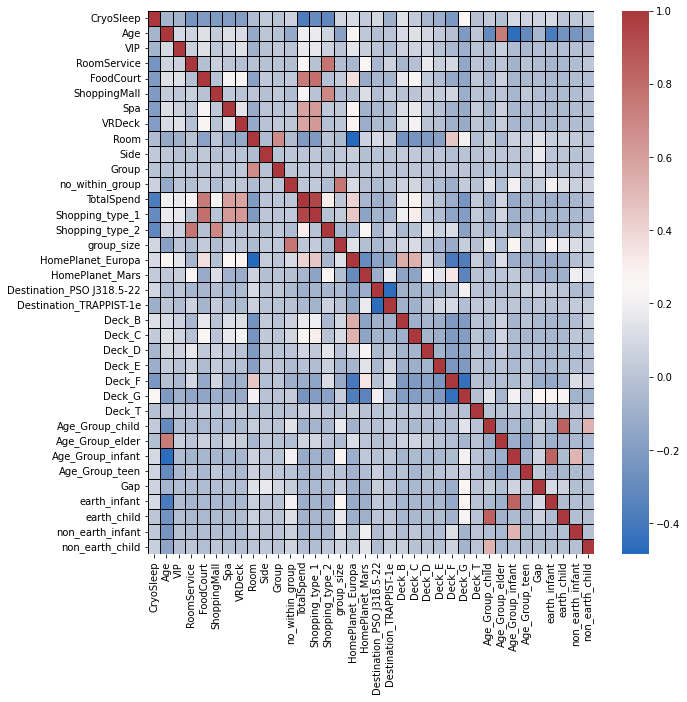

In [364]:
plt.figure(figsize=(10,10))
sns.heatmap(bayes_imputed_df.corr(),cmap='vlag',linecolor='black',linewidth=1)

We have engineered features like Shopping_Types,Age_Cohorts or Earth_infant which are highly correlated with original features.<br>
It is a good idea to drop these highly correlated features for more robust models and feature interpretation (See discussion [here](https://stats.stackexchange.com/questions/141619/wont-highly-correlated-variables-in-random-forest-distort-accuracy-and-feature)). I used cross-validation for different combinations of features to determine optimal features for each model in my ensemble model. <br>
